# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Create query to retrieve response from Openweather for weather data
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}"
weather_response = requests.get(query_url).json()
print(json.dumps(weather_response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 18.22,
        "lon": -63.06
    },
    "dt": 1584284653,
    "id": 3573374,
    "main": {
        "feels_like": 78.84,
        "humidity": 57,
        "pressure": 1017,
        "temp": 80.02,
        "temp_max": 82.4,
        "temp_min": 78.8
    },
    "name": "The Valley",
    "sys": {
        "country": "AI",
        "id": 8788,
        "sunrise": 1584267603,
        "sunset": 1584310925,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 10.29
    }
}


In [8]:
#Define url and units for Openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#Create record counter to capture the number for each city
city_record_count = 1

#Create empty lists to return weather details for each city
name_of_city = []
clouds = []
country = []
dt = []
humidity = []
lat = []
lon = []
temp_max = []
wind = []

#Loop through cities in cities list
for city in cities:
#When city name is found from search from Openweather site, append a series of weather data elements
#to the empty lists
    try:
        response = requests.get(f"{url}appid={weather_api_key}&q={city}&units={units}").json()
        name_of_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        city_record = response['name']
        print(f"Processing Record {city_record_count} | {city_record}")
    
        city_record_count = city_record_count + 1
        
        #Add sleep to avoid going over API call limit
        time.sleep(1.01)
        
    #If name of city is not found in city list, print city not found and skip.     
    except:
        print("City not found....skipping.")
        
    continue
    
    



Processing Record 1 | Cape Town
Processing Record 2 | Juegang
Processing Record 3 | Ushuaia
Processing Record 4 | Isangel
Processing Record 5 | Mataura
Processing Record 6 | Yumen
City not found....skipping.
Processing Record 7 | Taksimo
Processing Record 8 | Gonder
Processing Record 9 | Mayumba
Processing Record 10 | Punta Arenas
Processing Record 11 | Albany
Processing Record 12 | Manggar
Processing Record 13 | Salinópolis
Processing Record 14 | Coquimbo
Processing Record 15 | Flinders
Processing Record 16 | Busselton
Processing Record 17 | Port Elizabeth
Processing Record 18 | Saint Paul Harbor
Processing Record 19 | Marabá
Processing Record 20 | Grand Gaube
Processing Record 21 | Hamilton
Processing Record 22 | Yellowknife
Processing Record 23 | Hermanus
Processing Record 24 | Yulara
Processing Record 25 | Baruun-Urt
Processing Record 26 | Broome
Processing Record 27 | Qaanaaq
City not found....skipping.
City not found....skipping.
Processing Record 28 | Hasaki
Processing Record 29

Processing Record 229 | Beringovskiy
Processing Record 230 | Nemesnádudvar
Processing Record 231 | San Quintín
Processing Record 232 | Madison
Processing Record 233 | Tuatapere
City not found....skipping.
Processing Record 234 | Lixouri
Processing Record 235 | Lesogorsk
Processing Record 236 | Vardø
Processing Record 237 | Buraidah
Processing Record 238 | Kolondiéba
Processing Record 239 | Bambous Virieux
Processing Record 240 | Ancud
Processing Record 241 | Sterling
Processing Record 242 | Kiunga
Processing Record 243 | Cherskiy
Processing Record 244 | Muros
Processing Record 245 | Korla
Processing Record 246 | Zhangjiakou
Processing Record 247 | Atasū
Processing Record 248 | Borzna
Processing Record 249 | Watertown
Processing Record 250 | Port Hardy
Processing Record 251 | Olhão
City not found....skipping.
Processing Record 252 | Thinadhoo
Processing Record 253 | Mankāpur
Processing Record 254 | Bethel
Processing Record 255 | Taltal
Processing Record 256 | Evansville
Processing Recor

Processing Record 462 | Peniche
Processing Record 463 | Guadalupe y Calvo
Processing Record 464 | Kulhudhuffushi
Processing Record 465 | Gubkinskiy
Processing Record 466 | Milford
Processing Record 467 | Kurumkan
Processing Record 468 | Gigmoto
Processing Record 469 | Balkhash
Processing Record 470 | Kaka
Processing Record 471 | Bhādāsar
Processing Record 472 | Chardara
Processing Record 473 | Nizwá
Processing Record 474 | Itoman
City not found....skipping.
Processing Record 475 | Malpe
Processing Record 476 | Portland
Processing Record 477 | Champerico
City not found....skipping.
Processing Record 478 | Ogbomosho
Processing Record 479 | Fort Nelson
Processing Record 480 | Chumphon
Processing Record 481 | Bezhta
Processing Record 482 | Beloha
Processing Record 483 | Scarborough
Processing Record 484 | Deputatsky
City not found....skipping.
Processing Record 485 | Ejido
City not found....skipping.
Processing Record 486 | Altay
City not found....skipping.
Processing Record 487 | Novikovo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Create Data frame to include requested data elements and print first 5 rows
city_data_df = pd.DataFrame({"City": name_of_city, "Cloudiness": clouds, "Country": country, "Date": dt, 
                            "Humidity": humidity, "Lat": lat, "Lng": lon, "Max Temp": temp_max, 
                            "Wind Speed": wind})
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,20,ZA,1584285001,60,-33.93,18.42,71.01,31.09
1,Juegang,70,CN,1584285010,78,32.32,121.19,47.41,16.26
2,Ushuaia,75,AR,1584285011,67,-54.80,-68.30,57.20,4.47
3,Isangel,100,VU,1584284836,82,-19.55,169.27,82.71,29.84
4,Mataura,63,NZ,1584284838,94,-46.19,168.86,53.01,1.99


In [11]:
#Export Data frame to csv file
output_data_file = "output_data/cities.csv"
city_data_df.to_csv("cities.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

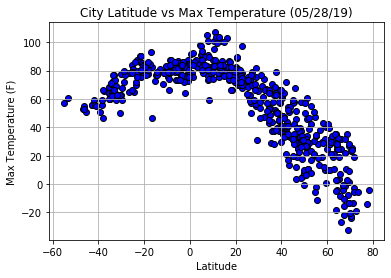

In [181]:
#Create scatter plot and add markers, titles, labels, and grid. Save scatter plot as a png file
plt.scatter(lat, temp_max, marker = 'o', color='blue', edgecolors = 'black')
plt.title("City Latitude vs Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('Lat vs Max Temp.png', dpi=80)
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

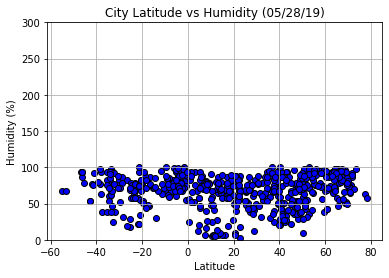

In [180]:
#Create scatter plot and add markers, titles, labels, and grid. Set ylim to range from 0 to 300. 
#Save scatter plot as a png file
plt.scatter(lat, humidity, marker = 'o', color='blue', edgecolors = 'black')
plt.title("City Latitude vs Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,300)
plt.savefig('Lat vs Humidity.png', dpi=80)
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

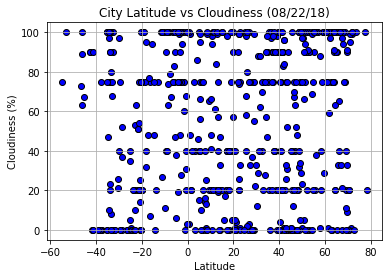

In [179]:
#Create scatter plot and add markers, titles, labels, and grid. Save scatter plot as a png file
plt.scatter(lat, clouds, marker = 'o', color='blue', edgecolors = 'black')
plt.title("City Latitude vs Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('Lat vs Cloudiness.png', dpi=80)
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

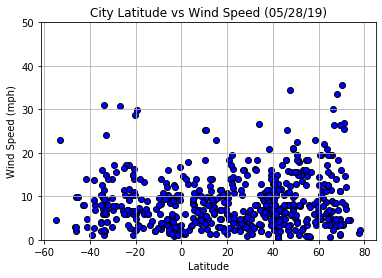

In [178]:
#Create scatter plot and add markers, titles, labels, and grid. Set ylim to range from 0 to 50. Save scatter plot as a png file
plt.scatter(lat, wind, marker = 'o', color='blue', edgecolors = 'black')
plt.title("City Latitude vs Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,50)
plt.savefig('Lat vs Wind Speed.png', dpi=80)
plt.grid()
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
#Create data frame to include weather elements related to cities in northern hemisphere
northern_hemi = city_data_df["Lat"].between(0, 90, inclusive = True) 
city_data_df[northern_hemi] 


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Juegang,70,CN,1584285010,78,32.32,121.19,47.41,16.26
5,Yumen,100,CN,1584285014,20,40.28,97.20,38.61,9.82
6,Taksimo,100,RU,1584285015,96,56.34,114.88,13.21,0.69
7,Gonder,99,ET,1584285017,27,12.60,37.47,75.69,12.28
10,Albany,1,US,1584284834,31,42.60,-73.97,39.99,6.67
...,...,...,...,...,...,...,...,...,...
551,Hirara,0,JP,1584285625,54,24.80,125.28,63.45,14.03
552,Novopskov,100,UA,1584285626,38,49.55,39.09,31.41,15.61
553,Sindor,0,RU,1584285627,88,62.86,51.89,10.35,3.31
555,Skudai,20,MY,1584285630,88,1.53,103.67,84.20,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8934625604117944


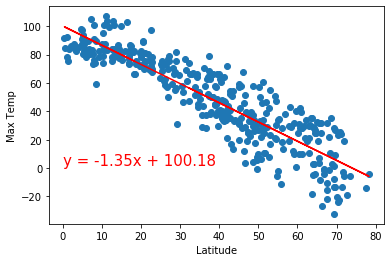

In [182]:
#Define x and y values for scatter plot
x_values = city_data_df[northern_hemi]["Lat"]
y_values = city_data_df[northern_hemi]["Max Temp"]

#Define variables for line equation, create scatter plot, perform linear regression, and add titles, labels. 
#Save plot as png file.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,2),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig('north_hemi Max Temp vs Lat.png', dpi=80)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
#Create Data frame including weather elements for cities in the southern hemisphere
southern_hemi = city_data_df["Lat"].between(-90, 0, inclusive = True)  
city_data_df[southern_hemi] 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,20,ZA,1584285001,60,-33.93,18.42,71.01,31.09
2,Ushuaia,75,AR,1584285011,67,-54.80,-68.30,57.20,4.47
3,Isangel,100,VU,1584284836,82,-19.55,169.27,82.71,29.84
4,Mataura,63,NZ,1584284838,94,-46.19,168.86,53.01,1.99
8,Mayumba,48,GA,1584285018,81,-3.43,10.66,82.71,12.53
...,...,...,...,...,...,...,...,...,...
543,Shakawe,95,BW,1584285617,44,-18.37,21.85,86.11,3.27
545,Lodja,100,CD,1584285619,68,-3.48,23.43,84.15,4.18
546,Caucayá,100,CO,1584285620,93,-0.19,-74.78,75.15,3.51
550,Ambunti,100,PG,1584285624,99,-4.24,142.84,73.35,1.30


The r-squared is: 0.6962771037278076


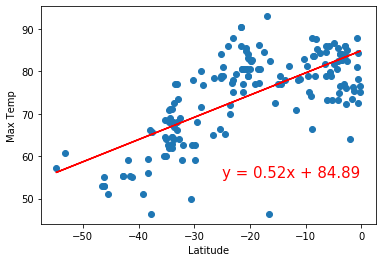

In [176]:
#Define x and y values for scatter plot
x_values = city_data_df[southern_hemi]["Lat"]
y_values = city_data_df[southern_hemi]["Max Temp"]

#Define variables for line equation, create scatter plot, perform linear regression, and add titles, labels. 
#Save plot as png file.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig('south_hemi Max Temp vs Lat.png', dpi=80)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29261044380583096


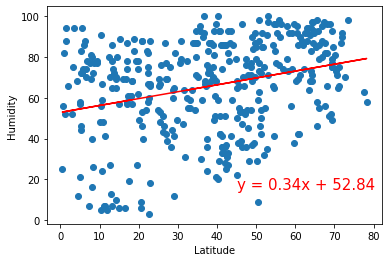

In [175]:
#Define x and y values for scatter plot
x_values = city_data_df[northern_hemi]["Lat"]
y_values = city_data_df[northern_hemi]["Humidity"]

#Define variables for line equation, create scatter plot, perform linear regression, and add titles, labels. 
#Save plot as png file.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('north_hemi Humidity vs Lat.png', dpi=80)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15362122549925136


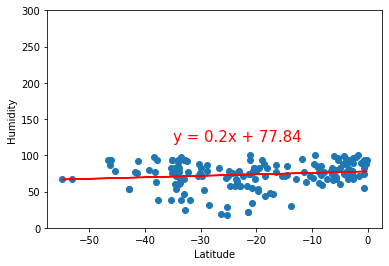

In [173]:
#Define x and y variables for scatterplot
x_values = city_data_df[southern_hemi]["Lat"]
y_values = city_data_df[southern_hemi]["Humidity"]

#Define variables for line equation, create scatter plot, perform linear regression, and add titles, labels. 
#Update ylim to range from 0 to 300. Save plot as png file 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,120),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(0,300)
plt.savefig('south_hemi Humidity vs Lat.png', dpi=80)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18618164794303427


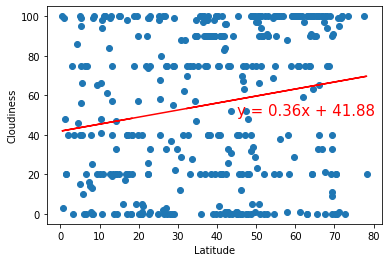

In [172]:
#Define x and y values for scatter plot
x_values = city_data_df[northern_hemi]["Lat"]
y_values = city_data_df[northern_hemi]["Cloudiness"]

#Define variables for line equation, create scatter plot, perform linear regression, and add titles, labels. 
#Save plot as png file.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('north_hemi Cloudiness vs Lat.png', dpi=80)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21056640631564547


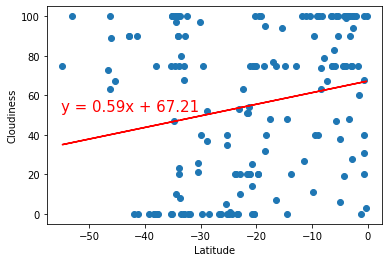

In [170]:
#Define x and y values for scatterplot
x_values = city_data_df[southern_hemi]["Lat"]
y_values = city_data_df[southern_hemi]["Cloudiness"]

#Define variables for line equation, create scatter plot, perform linear regression, and add titles, labels. 
#Save plot as png file.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,52),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('south_hemi Cloudiness vs Lat.png', dpi=80)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16795538706785457


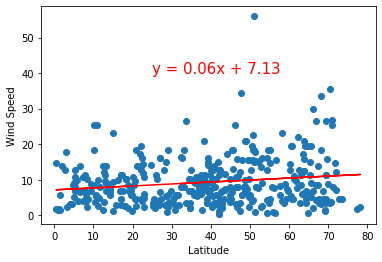

In [169]:
#Define x and y values for scatter plot
x_values = city_data_df[northern_hemi]["Lat"]
y_values = city_data_df[northern_hemi]["Wind Speed"]

#Define variables for line equation, create scatter plot, perform linear regression, and add titles, labels. 
#Save plot as png file.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('north_hemi wind vs Lat.png', dpi=80)
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.18230413846419893


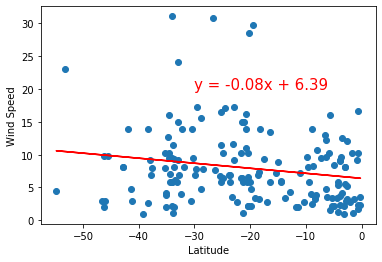

In [168]:
#Define x and y values for scatter plot
x_values = city_data_df[southern_hemi]["Lat"]
y_values = city_data_df[southern_hemi]["Wind Speed"]

#Define variables for line equation, create scatter plot, perform linear regression, and add titles, labels. 
#Save plot as png file.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('south_hemi wind vs Lat.png', dpi=80)
print(f"The r-squared is: {rvalue}")
plt.show()

#Analysis - 3 Observable Trends

1) Per the data there is a strong correlation between latitude and max temp of northern hemisphere cities from the data. There is a negative relationship between the elements indicated by the r-value of -0.89. Hence, maximum temperatures become much cooler for cities in the northern hemisphere with higher latitude values meaning temps are much cooler for cities that are further away from the equator.

2) There is also a strong correlation between latitude and max temp of southern hemisphere cities from the data. There is a positive relationship that exists between the variables. Maximum temperatures increase for southern hemisphere cities with latitudes closer to zero (i.e. closer to the equator). 

3) There is little to no correlation between lattiude and cloudiness, humidity, and wind speed across cities in the northern and southern hemispheres. This means there could be other elements with stronger correlation but are not plotted for the exercise. 